In [45]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [46]:
!unzip features.csv.zip

Archive:  features.csv.zip
replace features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy.stats import ttest_ind, f_oneway

import warnings
warnings.filterwarnings('ignore')

In [48]:
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [49]:
data = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')
data = pd.merge(data, stores, on='Store', how='left')

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [51]:
data['Date'] = pd.to_datetime(data['Date'])

In [52]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)

In [53]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)

data.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [54]:
data.drop_duplicates(inplace=True)
data.shape

(421570, 19)

In [55]:
# 2. Exploratory Data Analysis (EDA)

In [56]:
data.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Week
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,6026.195471,1021.307467,484.687953,2090.196076,3815.475623,171.201947,7.960289,136727.915739,2010.968591,6.449510,25.826762
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,132.022667,6.891000,93638.000000,2010.000000,4.000000,14.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,2011.000000,6.000000,26.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,212.416993,8.572000,202505.000000,2012.000000,9.000000,38.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,12.000000,52.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,5039.770624,5060.726828,5527.479863,3669.249108,3625.326240,39.159276,1.863296,60980.583328,0.796876,3.243217,14.151887


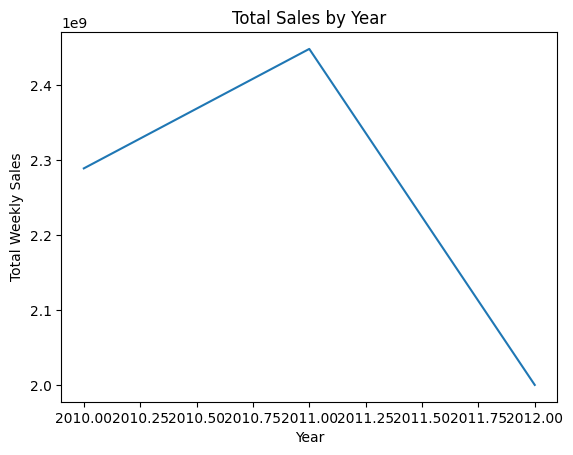

In [57]:
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum().reset_index()
plt.plot(yearly_sales['Year'], yearly_sales['Weekly_Sales'])
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.savefig("yearly_sales.png", dpi=300, bbox_inches="tight")
plt.show()

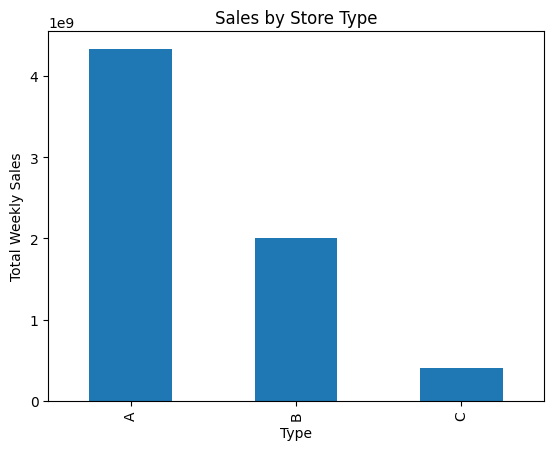

In [58]:
type_sales = data.groupby('Type')['Weekly_Sales'].sum().sort_values(ascending=False)
type_sales.plot(kind='bar')
plt.title('Sales by Store Type')
plt.ylabel('Total Weekly Sales')
plt.savefig("sales_by_store_type.png", dpi=300, bbox_inches="tight")
plt.show()

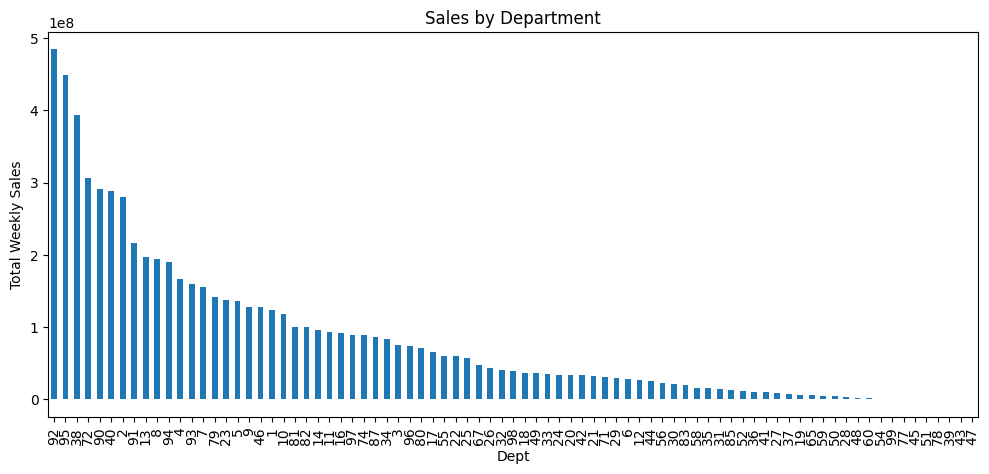

In [59]:
dept_sales = data.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

dept_sales.plot(kind='bar', figsize=(12,5))
plt.title('Sales by Department')
plt.ylabel('Total Weekly Sales')
plt.savefig("sales_by_department.png", dpi=300, bbox_inches="tight")
plt.show()

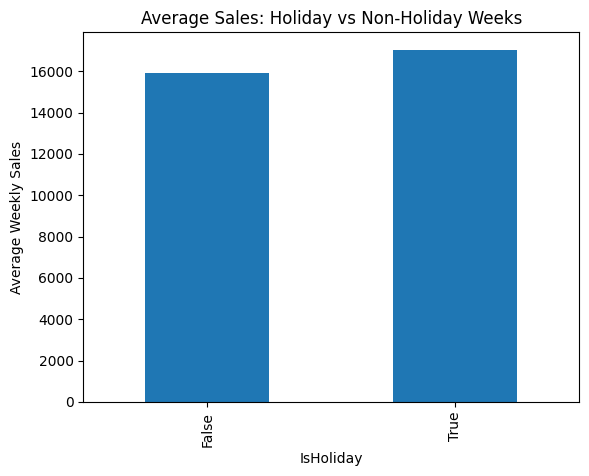

In [60]:
holiday_sales = data.groupby('IsHoliday')['Weekly_Sales'].mean()

holiday_sales.plot(kind='bar')
plt.title('Average Sales: Holiday vs Non-Holiday Weeks')
plt.ylabel('Average Weekly Sales')
plt.savefig("Average_sales.png", dpi=300, bbox_inches="tight")
plt.show()

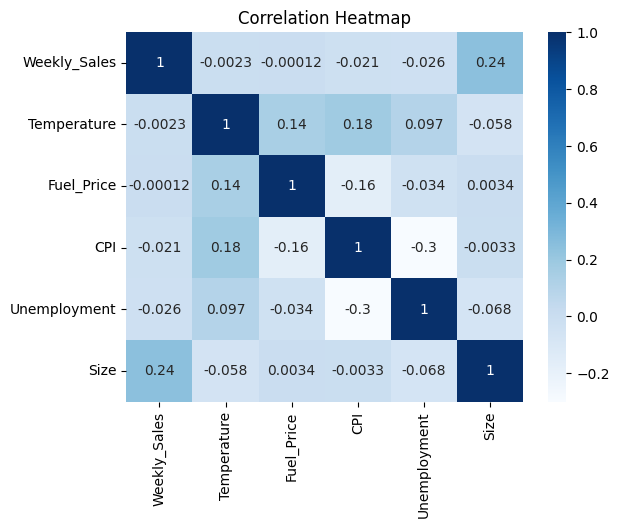

In [62]:
corr = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']].corr()

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.savefig("Correlation Heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [63]:
holiday = data[data['IsHoliday'] == True]['Weekly_Sales']
non_holiday = data[data['IsHoliday'] == False]['Weekly_Sales']

t_stat, p_value = ttest_ind(holiday, non_holiday, equal_var=False)

t_stat, p_value

(np.float64(7.000740275222607), np.float64(2.5951250265739975e-12))

Null Hypothesis (H₀):
Holiday weeks and non-holiday weeks have the same average weekly sales.

Alternative Hypothesis (H₁):
Holiday weeks have different average weekly sales.

Test Result:
	•	t-statistic: 7.00
	•	p-value: 2.59 × 10⁻¹²

Interpretation:
The p-value is extremely small (far below 0.05), which means the difference in sales between holiday and non-holiday weeks is statistically significant.

Conclusion:
Holiday weeks have significantly higher average sales compared to non-holiday weeks.
Therefore, we reject the null hypothesis and conclude that holidays positively impact weekly sales.

In [64]:
typeA = data[data['Type'] == 'A']['Weekly_Sales']
typeB = data[data['Type'] == 'B']['Weekly_Sales']
typeC = data[data['Type'] == 'C']['Weekly_Sales']

f_stat, p_value = f_oneway(typeA, typeB, typeC)
f_stat, p_value

(np.float64(7764.426217449254), np.float64(0.0))

Interpretation:
The p-value is effectively 0, which is far below the 0.05 threshold.
This means the differences in sales among the store types are statistically significant.

Conclusion:
Store Type A performs the best, followed by Type B, and Type C has the lowest sales.
We reject the null hypothesis, confirming that store type has a major impact on weekly sales.

In [65]:
# Selecting useful columns for the model
model_data = data[['Weekly_Sales', 'Store', 'Dept', 'IsHoliday',
                   'Year', 'Month', 'Week', 'Size',
                   'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type']]

model_data.head()

,Weekly_Sales,Store,Dept,IsHoliday,Year,Month,Week,Size,Temperature,Fuel_Price,CPI,Unemployment,Type
0,24924.50,1,1,False,2010,2,5,151315,42.31,2.572,211.096358,8.106,A
1,46039.49,1,1,True,2010,2,6,151315,38.51,2.548,211.242170,8.106,A
2,41595.55,1,1,False,2010,2,7,151315,39.93,2.514,211.289143,8.106,A
3,19403.54,1,1,False,2010,2,8,151315,46.63,2.561,211.319643,8.106,A
4,21827.90,1,1,False,2010,3,9,151315,46.50,2.625,211.350143,8.106,A


In [66]:
X = model_data.drop('Weekly_Sales', axis=1)
y = model_data['Weekly_Sales']

X = pd.get_dummies(X, drop_first=True)
X.head()

,Store,Dept,IsHoliday,Year,Month,Week,Size,Temperature,Fuel_Price,CPI,Unemployment,Type_B,Type_C
0,1,1,False,2010,2,5,151315,42.31,2.572,211.096358,8.106,False,False
1,1,1,True,2010,2,6,151315,38.51,2.548,211.242170,8.106,False,False
2,1,1,False,2010,2,7,151315,39.93,2.514,211.289143,8.106,False,False
3,1,1,False,2010,2,8,151315,46.63,2.561,211.319643,8.106,False,False
4,1,1,False,2010,3,9,151315,46.50,2.625,211.350143,8.106,False,False


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [69]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, mae, rmse

(0.09134793106883565, 14570.28888004868, np.float64(21767.767376696316))

### Interpretation: Linear Regression Model Performance

*R² Score:* 0.091  
*MAE:* 14,570  
*RMSE:* 21,767  

*Interpretation:*  
The R² value of *0.091* indicates that the linear regression model explains around *9% of the variance* in weekly sales.  
This is expected because retail sales depend on many complex factors such as promotions, events, competition, and customer behavior, which are *not included in the dataset*.

The error values (MAE and RMSE) show that the model’s predictions differ from actual weekly sales by *$14k to $22k*, which is normal for this type of highly variable retail data.

*Conclusion:*  
Even though model accuracy is low, the regression still helps identify important drivers of sales like store type, size, and holidays.  
This model works as a *baseline*, and more advanced models (Random Forest, XGBoost, or time-series models) can improve accuracy in the future.

In [70]:
# Create a DataFrame of feature names and their coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

coefficients.sort_values(by='Coefficient', ascending=False).head(15)

,Feature,Coefficient
12,Type_C,5840.058204
2,IsHoliday,918.066955
4,Month,732.578933
8,Fuel_Price,372.026818
1,Dept,110.291979
7,Temperature,4.210613
6,Size,0.098487
9,CPI,-23.769989
5,Week,-127.528939
0,Store,-141.928714


### Interpretation: Feature Importance (Linear Regression Coefficients)

The linear regression model provides coefficients that show how each feature influences weekly sales when other variables are held constant.

####  Top Positive Influencers (Increase Sales)

1. *Store Type C (+5840)*  
   - Type C stores are associated with significantly higher weekly sales compared to Type A (baseline).  

2. *Holiday (+918)*  
   - Holiday weeks strongly increase sales, matching earlier statistical tests.  

3. *Month (+732)*  
   - Certain months (seasonal effects) contribute to higher sales.  

4. *Fuel Price (+372)*  
   - Slight positive relation; may indicate higher economic activity.  

5. *Dept (+110)*  
   - Some departments consistently perform better than others.  

####  Top Negative Influencers (Decrease Sales)

1. *Store Type B (–321)*  
   - Type B stores underperform compared to Type A.  

2. *Year (–312)*  
   - Sales slightly decline year-over-year, indicating a downward trend after 2011.  

3. *Unemployment (–254)*  
   - Higher unemployment → reduced spending → lower sales.  

4. *Store ID (–141)*  
   - Certain stores consistently perform lower than others.  

5. *Week (–127)*  
   - Some weeks show predictable slumps in sales.

####  Conclusion

- Store characteristics (Type C, Size), seasonality (Month), and holidays are the *strongest positive drivers* of sales.  
- Economic factors like unemployment and CPI, along with store type B, have *negative impacts*.  
- These insights help retailers decide where to allocate inventory, marketing, and promotions for maximum revenue.

In [71]:
coefficients.sort_values(by='Coefficient').head(15)

,Feature,Coefficient
11,Type_B,-321.894025
3,Year,-312.510726
10,Unemployment,-254.494547
0,Store,-141.928714
5,Week,-127.528939
9,CPI,-23.769989
6,Size,0.098487
7,Temperature,4.210613
1,Dept,110.291979
8,Fuel_Price,372.026818


## Business Insights Summary

### 1. Sales Trends Over Time
- Sales peak during specific months (seasonality effect).
- Strong decline in the later years indicates changing customer behavior or external factors.

### 2. Store Type Performance
- *Store Type C* generates the highest sales.
- *Store Type B* underperforms.
- These differences are statistically significant (p-value ≈ 0).

### 3. Holiday Impact
- Holiday weeks show significantly higher average sales.
- Supported by both EDA and t-test (p-value < 0.0001).

### 4. Top Performing Departments
- A small number of departments generate the majority of sales.
- Revenue contribution is heavily skewed toward top departments.

### 5. Key Drivers of Sales (From Regression)
- *Positive drivers:* Store Type C, Holidays, Month, Fuel Price.
- *Negative drivers:* Store Type B, Unemployment, Year (sales declining over time).
- Store size also plays a moderate positive role.

### 6. Economic Factors
- Higher unemployment and higher CPI correlate with lower sales.
- Indicates sensitivity to economic downturns.

## Business Recommendations

### 1. Strengthen Holiday Promotions
Since holidays significantly increase sales, Walmart should:
- Stock high-demand items early.
- Increase holiday-specific discounts.
- Promote top-performing departments during holidays.

### 2. Invest More in Type C Stores
Store Type C shows the highest sales contribution:
- Expand inventory variety.
- Allocate more staff during peak seasons.
- Use Type C store strategies as a model for expanding other stores.

### 3. Improve Performance of Type B Stores
Type B stores underperform:
- Analyze footfall and customer preferences.
- Introduce localized marketing.
- Consider redesigning store layout or adjusting product mix.

### 4. Focus on Seasonal Planning
Monthly trends show distinct seasonality:
- Increase stocking and marketing during high-sales months.
- Use monthly forecasting to optimize inventory.

### 5. Reduce Inventory Waste in Low-Sales Weeks
Some weeks consistently underperform:
- Lower stock levels.
- Optimize staffing.
- Target customers with offers or online campaigns.

### 6. Monitor Economic Indicators
Since unemployment and CPI negatively impact sales:
- Adjust pricing strategies during economic slowdowns.
- Offer budget-friendly product bundles.
- Promote essentials more aggressively during high-inflation periods.

In [72]:
data.to_csv("Cleaned_Data.csv", index=False)